In [1]:
%run -i 'init.py'

## Test Case
Non-traditional ETFs do manage to meet their daily target (2:1 or 3:1), but since they "rebalance" daily, the long-term results may be skewed. Say you have bought a 3:1-leveraged ETF that targets thrice the return of index XY. You pay \$100 to buy a share of ETF when the benchmark index is at 10,000. If index XY zooms up 10% the next day to 11,000, the leveraged ETF would increase 30% to \$130. Now, if the index falls from 11,000 back down to 10,000 the following day, there is a 9.09% decline. The leveraged ETF you are holding would __go down thrice, i.e. by 27.27%__. Now, although the index returned to the starting point, a 27.27% decline __from \$130__ would leave you with an ETF share worth just \$94.55, i.e. the ETF share is down by 5.45%.

Read more: A Guide For Buying ETFs On Margin | Investopedia https://www.investopedia.com/articles/investing/060314/guide-buying-etfs-margin.asp#ixzz5NhiSeriw 
Follow us: Investopedia on Facebook

In [2]:
fund = 10000
leverage = 3
margin = 3
Simulate_Path([0.1, -0.0909], fund, margin, leverage)

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
0,NaN,10000.0,NaN,NaN,40000.0,NaN,NaN,10000.0,NaN,NaN
1,10.00,11000.0,1000.0,10.000,44000.0,4000.0,40.000,13000.0,3000.0,30.000
2,-9.09,10000.1,0.1,0.001,40000.4,0.4,0.004,9454.9,-545.1,-5.451


## Historic Data
Simulate porfolio networth with real historic S&P500 index data under three different investment strategies:
1. Investing fund in normal ETF (Nrm).
2. Investing fund in normal ETF with 200% margin (3x).
3. Investing fund in 3 times leveraged ETF (Lvg).

Adjust starting date (tail_dy), ending date (head_dy), starting fund and leverage as needed

In [3]:
cwd = os.getcwd()
df_historic = pd.read_csv(os.path.join(cwd, "S&P500.csv"), sep = ',')
df_historic = df_historic[::-1]

head_dy = '2009-08-09'
tail_dy = '2018-08-09'

# or get current date
# tail_dy = datetime.today().strftime('%Y-%m-%d')

df_historic = df_historic[(df_historic["Date"] > head_dy) & (df_historic["Date"] < tail_dy)]
df_historic = df_historic.set_index("Date")

In [4]:
fund = 10000
leverage = 3
margin = 1
df_path = Simulate_Path(df_historic["Change %"], fund, margin, leverage)

df_path = df_path[1:]
df_path["Date"] = df_historic.index.values
df_path = df_path.set_index("Date")
title = "Investing $%i in %s ~ %s"%(fund, df_path.index.values[0], df_path.index.values[-1])

In [5]:
df_path[:5]

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
Date,,,,,,,,,,
2009-08-10,-0.33,9967.000000,-33.000000,-0.330000,19934.000000,-66.000000,-0.660000,9901.000000,-99.000000,-0.990000
2009-08-11,-1.27,9840.419100,-159.580900,-1.595809,19680.838200,-319.161800,-3.191618,9523.771900,-476.228100,-4.762281
2009-08-12,1.15,9953.583920,-46.416080,-0.464161,19907.167839,-92.832161,-0.928322,9852.342031,-147.657969,-1.476580
2009-08-13,0.69,10022.263649,22.263649,0.222636,20044.527297,44.527297,0.445273,10056.285511,56.285511,0.562855
2009-08-14,-0.85,9937.074408,-62.925592,-0.629256,19874.148815,-125.851185,-1.258512,9799.850230,-200.149770,-2.001498


In [6]:
df_path[-5:]

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
Date,,,,,,,,,,
2018-08-02,0.49,27953.773506,17953.773506,179.537735,55907.547012,35907.547012,359.075470,119795.627676,109795.627676,1097.956277
2018-08-03,0.46,28082.360864,18082.360864,180.823609,56164.721728,36164.721728,361.647217,121448.807338,111448.807338,1114.488073
2018-08-06,0.35,28180.649127,18180.649127,181.806491,56361.298254,36361.298254,363.612983,122724.019815,112724.019815,1127.240198
2018-08-07,0.28,28259.554944,18259.554944,182.595549,56519.109889,36519.109889,365.191099,123754.901582,113754.901582,1137.549016
2018-08-08,-0.03,28251.077078,18251.077078,182.510771,56502.154156,36502.154156,365.021542,123643.522170,113643.522170,1136.435222


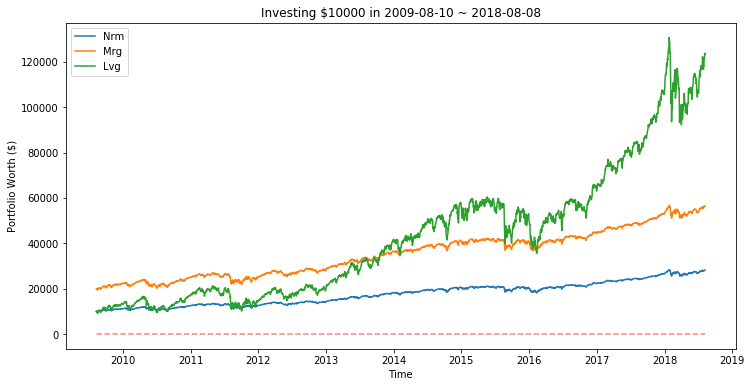

In [7]:
Plot_3(df_path, [key_nrm, key_mrg, key_lvg],
      "Time", "Portfolio Worth ($)", title, save = True)

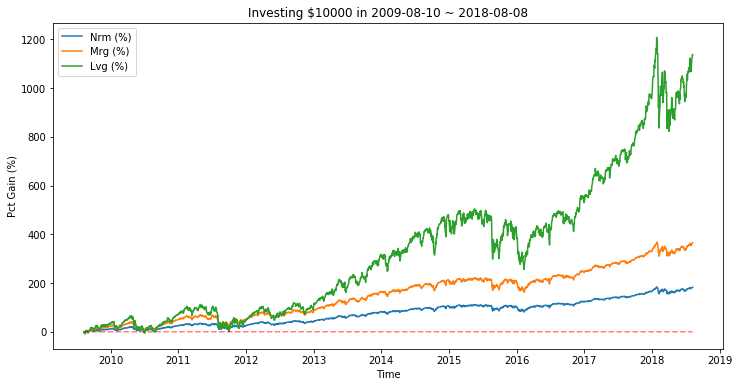

In [8]:
Plot_3(df_path, [key_pctn, key_pctm, key_pctl],
      "Time", "Pct Gain (%)", title, save = True)

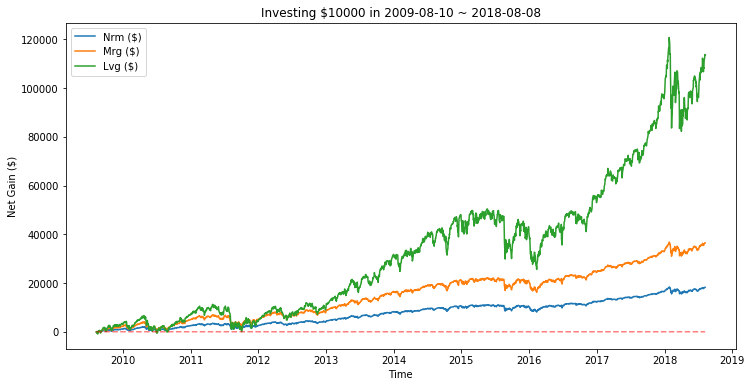

In [9]:
Plot_3(df_path, [key_netn, key_netm, key_netl],
      "Time", "Net Gain ($)", title, save = True)

## Cash-out

In [10]:
df_out = pd.DataFrame(columns = [key_nrm, key_mrg, key_lvg])
df_out[key_nrm] = df_path[key_nrm]
df_out[key_mrg] = df_path[key_mrg] - fund * margin
df_out[key_lvg] = df_path[key_lvg]

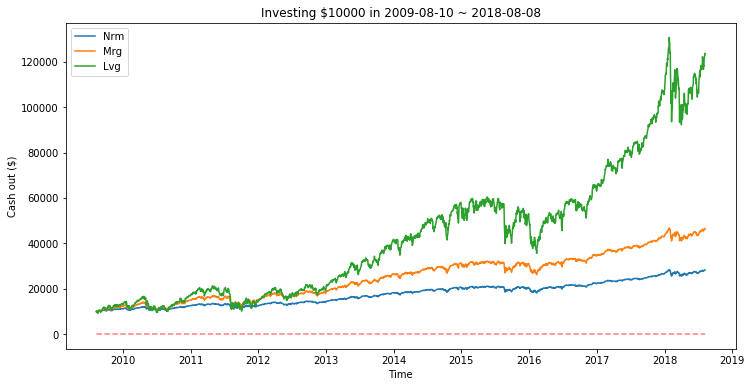

In [11]:
Plot_3(df_out, [key_nrm, key_mrg, key_lvg],
      "Time", "Cash out ($)", title, save = True)